## Import bibliotek i danych

In [3]:
# biblioteki do manipulacji zbiorem
import pandas as pd
import numpy as np

# wizualizacja danych
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.cm as cm

# redukcja wymiarów zbioru - na potrzeby wizualizacji grup
from sklearn.decomposition import PCA

# skalowanie zmiennych - wskazane przy metodach korzystających z miar odległości
from sklearn.preprocessing import StandardScaler

# biblioteki do grupowania hierarchicznego: sklearn i scipy
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# grupowanie k-średnich i wynik silehoutte
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [4]:
diabetes_data = pd.read_csv('diabetes.csv')

## Zastąpienie braków, standaryzacja danych

In [5]:
diabetes_data_fix = diabetes_data.copy(deep = True)
diabetes_data_fix[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_fix[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
diabetes_data_fix


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      NaN  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [62]:
dd = diabetes_data_fix.copy()

# zastąpienie braków
dd['Glucose'].fillna(dd['Glucose'].mean(), inplace = True)
dd['BloodPressure'].fillna(dd['BloodPressure'].mean(), inplace = True)
dd['SkinThickness'].fillna(dd['SkinThickness'].median(), inplace = True)
dd['Insulin'].fillna(dd['Insulin'].median(), inplace = True)
dd['BMI'].fillna(dd['BMI'].mean(), inplace = True)

data_X = dd.loc[:, 'Pregnancies':'Age']
data_y = dd.loc[:, 'Outcome']

data_X = pd.DataFrame(StandardScaler().fit_transform(data_X), columns= data_X.columns)
dd = data_X


data_y = pd.DataFrame(data_y)
data_y = data_y.rename(columns={'Outcome': 'Czy chory?'})
X = pd.DataFrame(data_X, index = data_X.index, columns=data_X.columns)
all_data = X.join(data_y)
all_data


dd_after_preparing = all_data.copy()



## Klasteryzacja


Dla  2  klastrów wartość testu silhouette wynosi : 0.19426743123151544
Dla  3  klastrów wartość testu silhouette wynosi : 0.19497260912675526
Dla  4  klastrów wartość testu silhouette wynosi : 0.18416527336898922
Dla  5  klastrów wartość testu silhouette wynosi : 0.14258081623926033
Dla  6  klastrów wartość testu silhouette wynosi : 0.1321525633909082
Dla  7  klastrów wartość testu silhouette wynosi : 0.14016295568965115
Dla  8  klastrów wartość testu silhouette wynosi : 0.13358773369312543


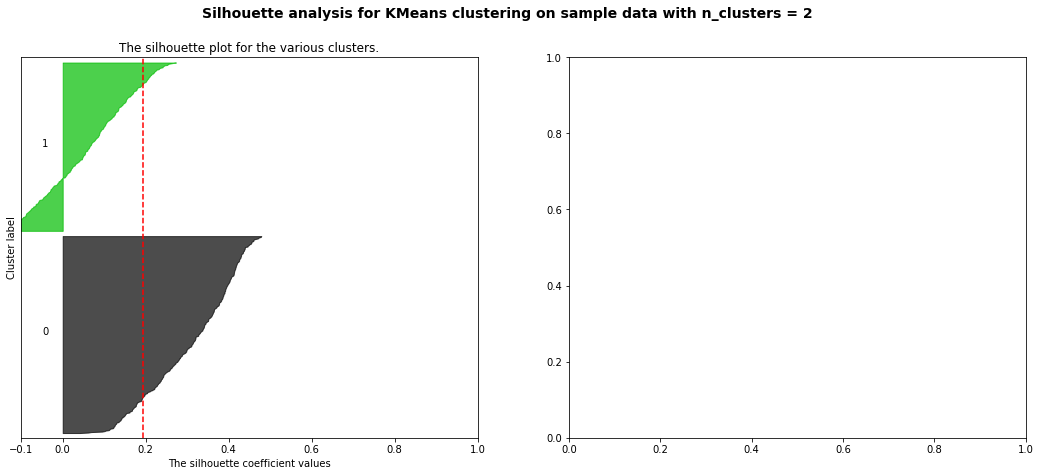

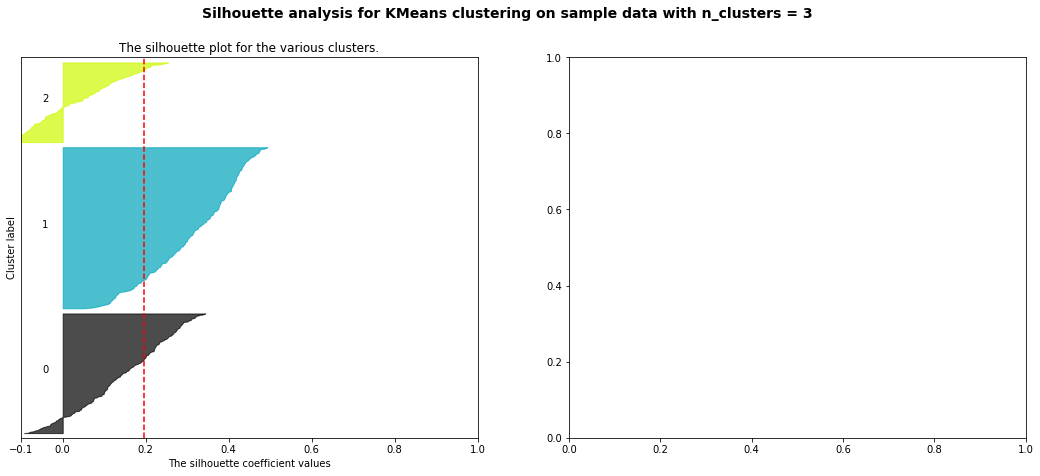

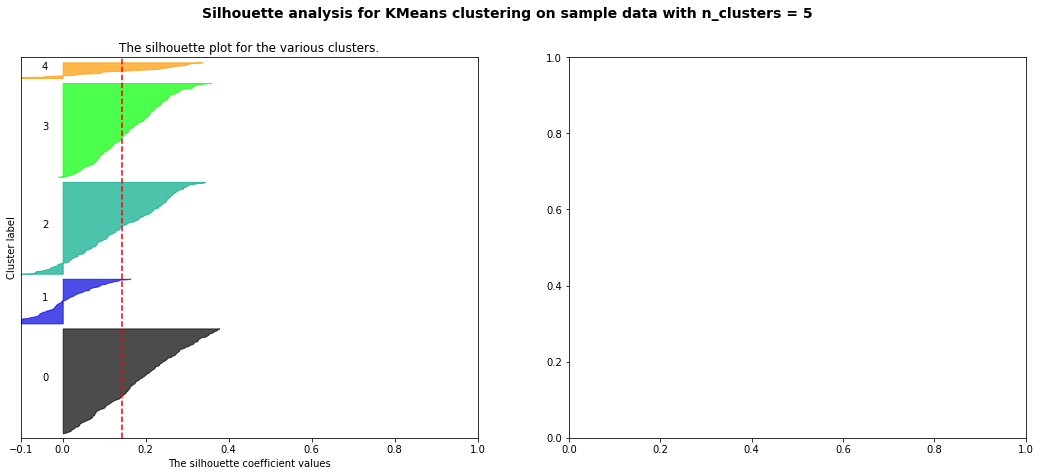

In [55]:


range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
X = all_data
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Dla ", n_clusters,
          " klastrów wartość testu silhouette wynosi :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [56]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(all_data)
y_kmeans = kmeans.predict(all_data)
all_data['Klaster'] = y_kmeans
centers = kmeans.cluster_centers_


In [58]:
all_data.groupby(['Klaster', 'Czy chory?']).count()

0    1    2    3    4    5    6    7
Klaster Czy chory?                                        
0       0           357  357  357  357  357  357  357  357
        1            64   64   64   64   64   64   64   64
1       0           143  143  143  143  143  143  143  143
        1           204  204  204  204  204  204  204  204

# Grupowanie hierarchiczne
## Przejrzenie statystyk zbioru

In [64]:
dd2 = dd_after_preparing
dd2.agg(['mean', 'median', 'std', 'min', 'max']).round(1)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
mean            0.0     -0.0            0.0           -0.0      0.0  0.0   
median         -0.3     -0.2           -0.0           -0.0     -0.2 -0.0   
std             1.0      1.0            1.0            1.0      1.0  1.0   
min            -1.1     -2.6           -4.0           -2.5     -1.5 -2.1   
max             3.9      2.5            4.1            8.0      8.2  5.0   

        DiabetesPedigreeFunction  Age  Czy chory?  
mean                         0.0  0.0         0.3  
median                      -0.3 -0.4         0.0  
std                          1.0  1.0         0.5  
min                         -1.2 -1.0         0.0  
max                          5.9  4.1         1.0

In [65]:
sns.distplot(dd2.Pregnancies, color = '#eb6c6a').set(title = 'Wykres gęstości - zmienna Ilość ciąż')
plt.show()

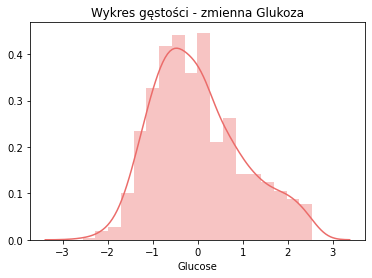

In [66]:
sns.distplot(dd2.Glucose, color = '#eb6c6a').set(title = 'Wykres gęstości - zmienna Glukoza')
plt.show()

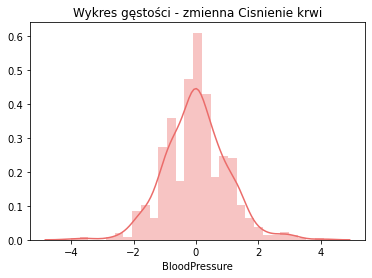

In [67]:
sns.distplot(dd2.BloodPressure, color = '#eb6c6a').set(title = 'Wykres gęstości - zmienna Cisnienie krwi')
plt.show()

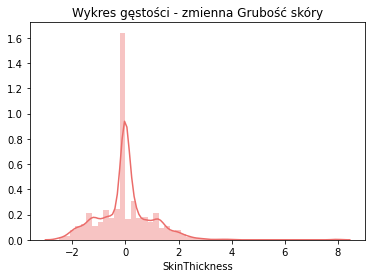

In [68]:
sns.distplot(dd2.SkinThickness, color = '#eb6c6a').set(title = 'Wykres gęstości - zmienna Grubość skóry')
plt.show()

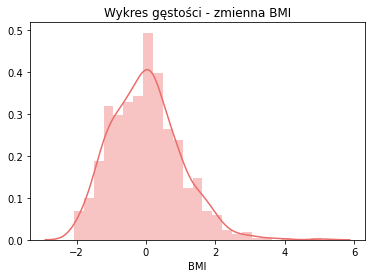

In [69]:
sns.distplot(dd2.BMI, color = '#eb6c6a').set(title = 'Wykres gęstości - zmienna BMI')
plt.show()

In [70]:
sns.distplot(dd2.DiabetesPedigreeFunction, color = '#eb6c6a').set(title = 'Wykres gęstości - zmienna Wynik Funkcji Pedigree')
plt.show()

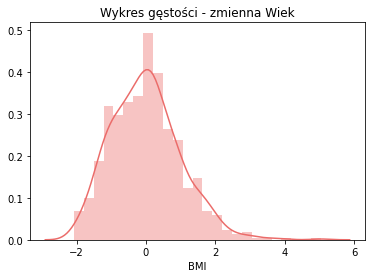

In [71]:
sns.distplot(dd2.BMI, color = '#eb6c6a').set(title = 'Wykres gęstości - zmienna Wiek')
plt.show()

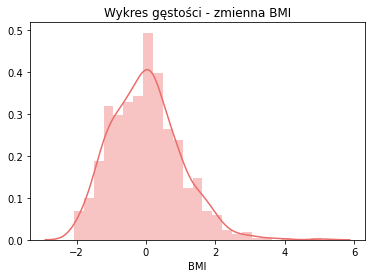

In [75]:
sns.distplot(dd2.BMI, color = '#eb6c6a').set(title = 'Wykres gęstości - zmienna BMI')
plt.show()

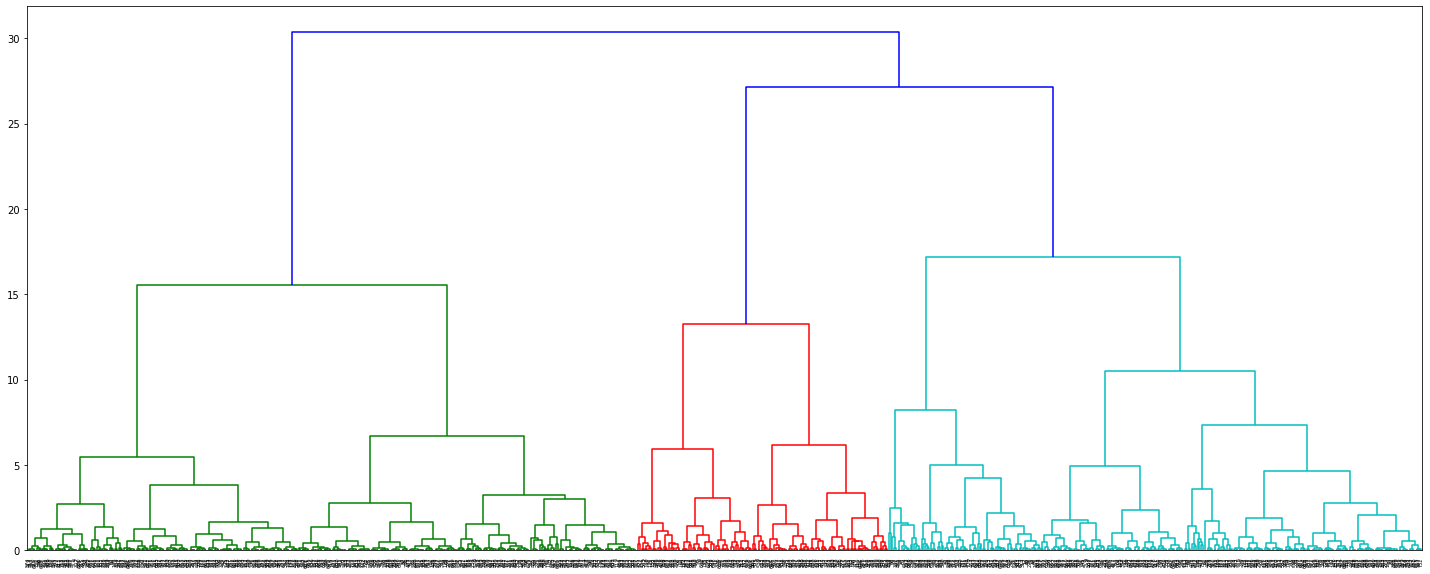

In [74]:
model_1 = linkage(dd2.iloc[:,0:2], method = 'ward', metric = 'euclidean')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(model_1)
plt.show()